In [1]:
## Source the files in the "functions" folder
files <- dir("functions",full.names=TRUE)
for(i in 1:length(files)) source(files[i])

### read & plot


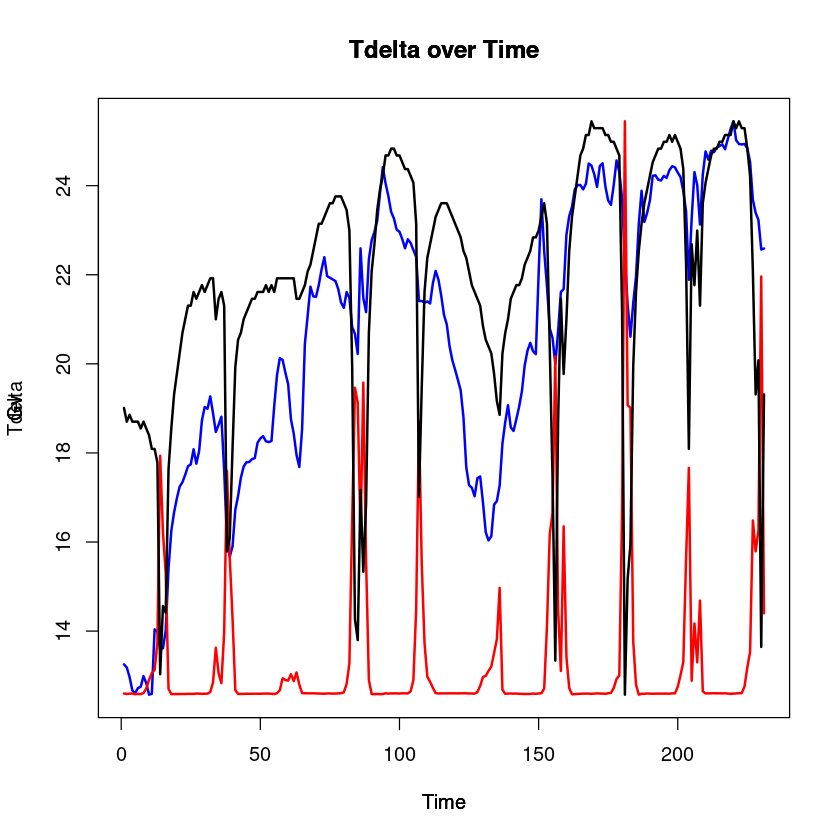

In [2]:
D <- read.csv("box_data_60min.csv", header = TRUE)
D$thour <- D$thour-D$thour[1]+1

par(bg = 'white')
plot(D$thour,D$Tdelta, type = "l", col = "blue", lwd = 2, xlab = "Time", ylab = "Tdelta", main = "Tdelta over Time")
# plot on the same graph secondary y-axis
par(new = TRUE)
plot(D$thour,D$Gv, type = "l", col = "red", lwd = 2, xlab = "Time", ylab = "Gv", main = "Tdelta over Time", axes = FALSE)
# third y axis
par(new = TRUE)
plot(D$thour,D$Ph, type = "l", col = "black", lwd = 2, xlab = "Time", ylab = "Gv", main = "Tdelta over Time", axes = FALSE)

2. Split the data into a train and test set, such that ”2013-02-06 00:00” is the last data point in the
training set (i.e. thour = 1, ..., 167 is the training set). From now on, work only on the training
set, except where explicitly told to use the test set.

In [37]:
'ÆL NVCVN_'

[1] "ÆL NVCVN_"

3. Investigate the variables and their relations: e.g. with scatter, auto-correlation and cross-correlation
plots. Most focus on Ph. Highlight key aspects of the dynamics and interrelationships among
the variables. What can be seen directly and what canno

png 
  3

pdf 
  2

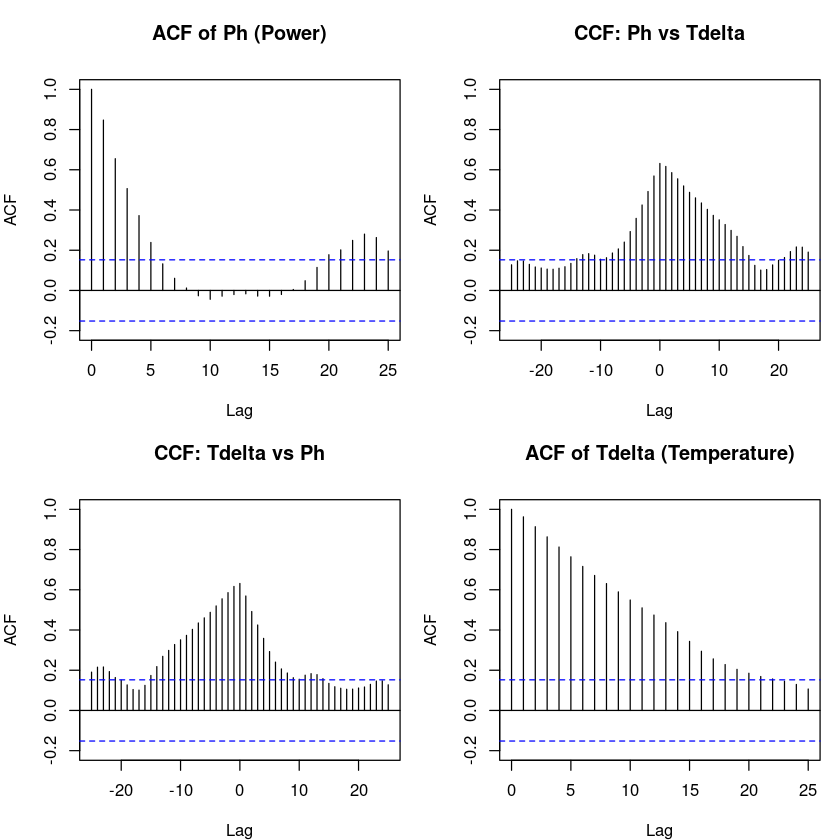

png 
  3

pdf 
  2

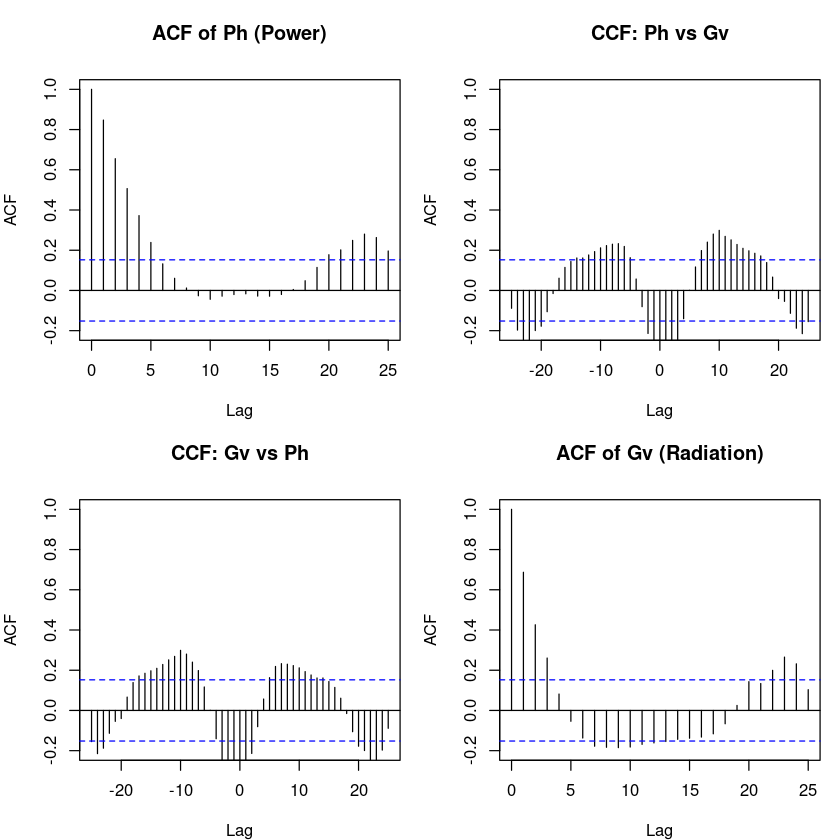

In [ ]:
# Plot with 2*2 subplots with headlines for each subplot
par(mfrow=c(2,2), mar=c(4,4,4,1), bg = 'white') 

acf(Dtrain$Ph, main = "ACF of Ph (Power)", lag.max = 25, ylim = c(-0.2, 1))

ccf(Dtrain$Ph, Dtrain$Tdelta, lag.max = 25, ylim = c(-0.2, 1), main = "CCF: Ph vs Tdelta")

ccf(Dtrain$Tdelta, Dtrain$Ph, lag.max = 25, ylim = c(-0.2, 1), main = "CCF: Tdelta vs Ph")

acf(Dtrain$Tdelta, lag.max = 25, ylim = c(-0.2, 1), main = "ACF of Tdelta (Temperature)")
# save figure
dev.copy(png, file = "acf_ccf_Ph_Tdelta.png", width = 600, height = 600, res = 100)
dev.off()

par(mfrow=c(2,2), mar=c(4,4,4,1), bg = 'white') 

acf(Dtrain$Ph, main = "ACF of Ph (Power)", lag.max = 25, ylim = c(-0.2, 1))

ccf(Dtrain$Ph, Dtrain$Gv, lag.max = 25, ylim = c(-0.2, 1), main = "CCF: Ph vs Gv")

ccf(Dtrain$Gv, Dtrain$Ph, lag.max = 25, ylim = c(-0.2, 1), main = "CCF: Gv vs Ph")

acf(Dtrain$Gv, lag.max = 25, ylim = c(-0.2, 1), main = "ACF of Gv (Radiation)")
# save figure
# bigger text size
dev.copy(png, file = "acf_ccf_Ph_Gv.png", width = 600, height = 600, res = 100)
dev.off()




3.4. Estimate the impulse response from Tdelta and Gv to Ph make it up to lag 10. Present it for both
variables in plots and comment

In [5]:
lag_matrix <- function(x, max_lag) {
  n <- length(x)
  m <- matrix(0, n, max_lag)
  for (i in 1:max_lag) {
    m[(i+1):n, i] <- x[1:(n - i)]
  }
  return(m)
}

head(lag_matrix(Dtrain$Ph, 10),6)
head(Dtrain[6:16], 5)
head(Dtrain[17:27], 5)
head(Dtrain[28:38], 5)

0,0,0,0,0,0,0,0,0,0
56,0,0,0,0,0,0,0,0,0
54,56,0,0,0,0,0,0,0,0
55,54,56,0,0,0,0,0,0,0
54,55,54,56,0,0,0,0,0,0
54,54,55,54,56,0,0,0,0,0


,Ph.l0,Ph.l1,Ph.l2,Ph.l3,Ph.l4,Ph.l5,Ph.l6,Ph.l7,Ph.l8,Ph.l9,Ph.l10
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,56,55,57,57,58,59,59,59,59,59,58
2,54,56,55,57,57,58,59,59,59,59,59
3,55,54,56,55,57,57,58,59,59,59,59
4,54,55,54,56,55,57,57,58,59,59,59
5,54,54,55,54,56,55,57,57,58,59,59


,Tdelta.l0,Tdelta.l1,Tdelta.l2,Tdelta.l3,Tdelta.l4,Tdelta.l5,Tdelta.l6,Tdelta.l7,Tdelta.l8,Tdelta.l9,Tdelta.l10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,13.95471,14.30092,14.37683,14.00325
2,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,13.95471,14.30092,14.37683
3,12.96879,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,13.95471,14.30092
4,12.66775,12.96879,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,13.95471
5,12.60525,12.66775,12.96879,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900


,Gv.l0,Gv.l1,Gv.l2,Gv.l3,Gv.l4,Gv.l5,Gv.l6,Gv.l7,Gv.l8,Gv.l9,Gv.l10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003,8.2623385,20.4754845
2,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003,8.2623385
3,-0.6432978,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003
4,-0.4560078,-0.6432978,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765
5,-1.5340601,-0.4560078,-0.6432978,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668


Side 228 i bogen!!

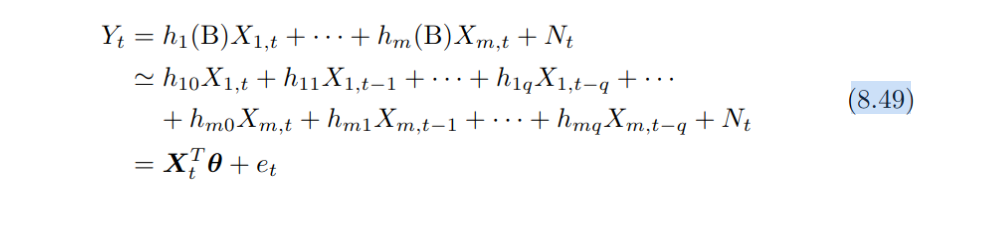
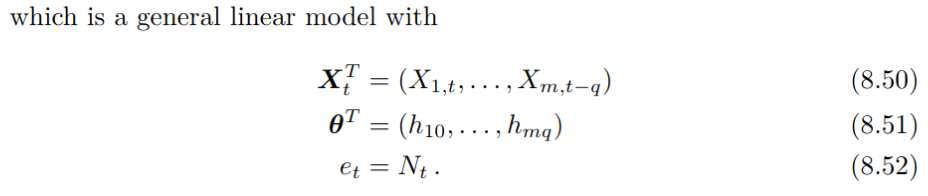

In [6]:
# estimating the impulse response form Tdelta and Gv to Ph using LS
Tdelta_lag10 <- Dtrain[17:27]
Gv_lag10 <- Dtrain[28:38]

x <- as.matrix(cbind(Tdelta_lag10,Gv_lag10))
y <- as.matrix(Dtrain[3])



In [7]:
#print the shape of x
print(dim(Gv_lag10))
print(dim(x))
print(dim(y))
head(x,5)

[1] 166  11


[1] 166  22
[1] 166   1


,Tdelta.l0,Tdelta.l1,Tdelta.l2,Tdelta.l3,Tdelta.l4,Tdelta.l5,Tdelta.l6,Tdelta.l7,Tdelta.l8,Tdelta.l9,⋯,Gv.l1,Gv.l2,Gv.l3,Gv.l4,Gv.l5,Gv.l6,Gv.l7,Gv.l8,Gv.l9,Gv.l10
1,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,13.95471,14.30092,14.37683,⋯,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003,8.2623385,20.4754845
2,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,13.95471,14.30092,⋯,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003,8.2623385
3,12.96879,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,13.95471,⋯,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765,-0.1427003
4,12.66775,12.96879,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,14.18900,⋯,-0.6432978,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668,-0.4517765
5,12.60525,12.66775,12.96879,13.18146,13.25358,13.10133,12.71000,12.83942,13.52604,13.86008,⋯,-0.4560078,-0.6432978,-1.1270349,-0.4986434,-0.4993379,-0.4179587,-0.2210110,-0.4533753,-0.7472384,-0.6692668


In [8]:
theta <- solve(t(x) %*% x) %*% t(x) %*% y

# Predicted values
y_hat <- x %*% theta

# Compare actual vs predicted for a few rows
data.frame(
  Actual = round(y[1:10], 3),
  Predicted = round(y_hat[1:10], 3),
  Residual = round(y[1:10] - y_hat[1:10], 3)
)

Actual,Predicted,Residual
<dbl>,<dbl>,<dbl>
56,53.357,2.643
54,53.858,0.142
55,54.423,0.577
54,52.930,1.070
54,52.015,1.985
54,51.522,2.478
53,51.626,1.374
54,52.010,1.990
53,51.674,1.326


png 
  3

pdf 
  2

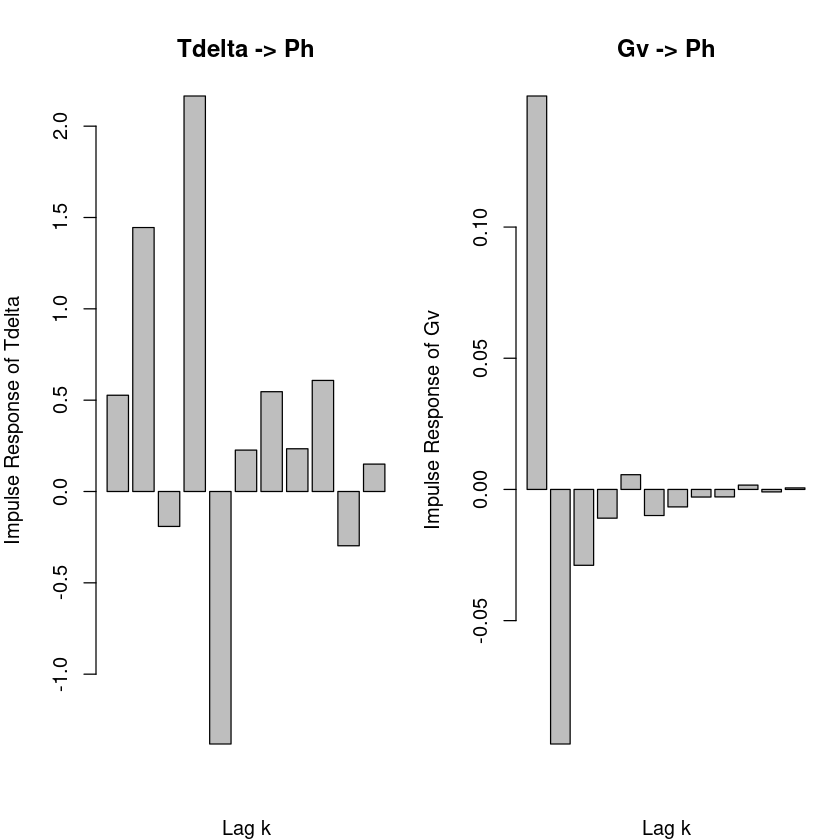

In [9]:
#Plot the impulse responses seperately for Tdelta and Gv
par(mfrow=c(1,2), mar=c(4,4,4,1), bg = 'white')
barplot(theta[0:11],xlab = "Lag k", ylab =  "Impulse Response of Tdelta", main = "Tdelta -> Ph")
barplot(theta[11:22],xlab = "Lag k", ylab = "Impulse Response of Gv", main = "Gv -> Ph")

dev.copy(png, file = "Impulse_response.png", width = 600, height = 600, res = 100)
dev.off()

# 3.5 Fit linear regression model to Ph (power)
#Ph,t = ω1Tdelta,t + ω2Gv,t + εt

section 9.7.1 in book

           [,1]
[1,] 11.3990811
[2,]  3.3211151
[3,] -0.1113063


png 
  3

pdf 
  2

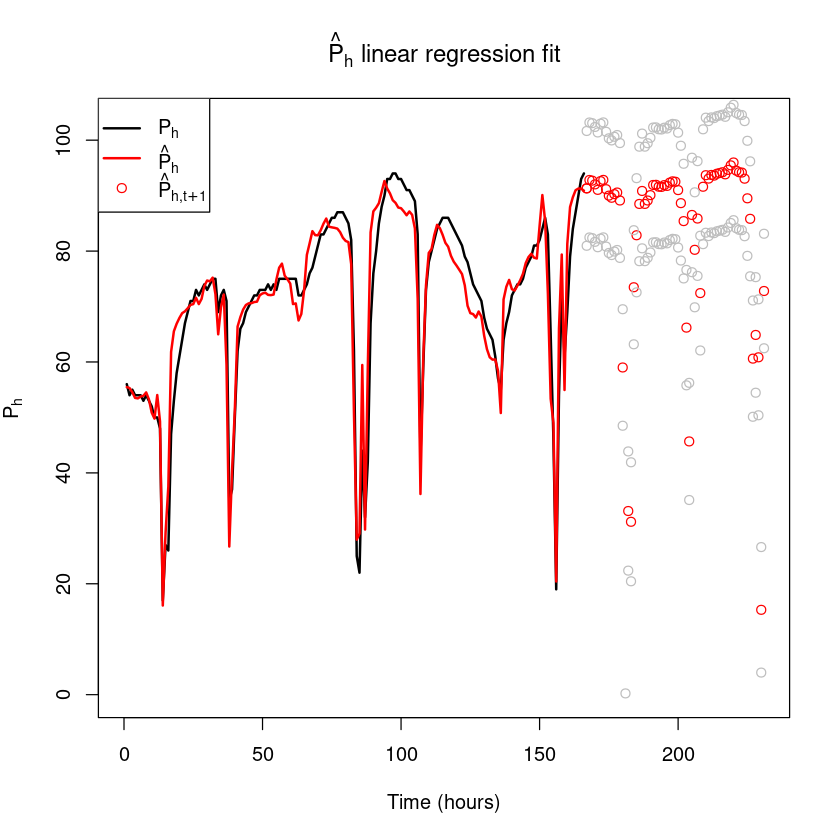

In [36]:
X <- cbind(1, Dtrain$Tdelta, Dtrain$Gv)  # include intercept
Y <- Dtrain$Ph
parameters <- solve(t(X) %*% X) %*% t(X) %*% Y

Y_hat <- X %*% parameters
residuals <- Y - Y_hat

# one-step predictions
X_future <- cbind(1, Dtest$Tdelta, Dtest$Gv)  # include intercept
Y_hat_future <- X_future %*% parameters

# one-step prediction confidence interval (page 270 in book)
# https://analystprep.com/study-notes/frm/part-1/quantitative-analysis/hypothesis-tests-and-confidence-intervals-in-multiple-regression/

n <- length(Dtrain$Ph) # number of observations
k <- 2 # number of predictors, not counting the intercept

sig2 <- sum(residuals^2) / (n - k - 1) # estimate of the variance of the error term
t_value <- qt(0.025, n-k-1)  # 95% confidence interval, so alpha/2 = 0.025


# iterative confidence intervals
upper <- numeric(length(Dtest$thour))
lower <- numeric(length(Dtest$thour))
for (i in 1:length(Dtest$thour)) {
  se <- sqrt(sig2 * (1 + t(X_future[i, ]) %*% solve(t(X) %*% X) %*% X_future[i, ])) # standard error of the prediction
  upper[i] <- Y_hat_future[i] + t_value * se
  lower[i] <- Y_hat_future[i] - t_value * se
}
# se <- sqrt(sig2*(1+t(X_future[1,]) %*% solve(t(X) %*% X) %*% X_future[1,])) # standard error of the prediction

# upper <- Y_hat_future[1,] + t_value * se
# lower <- Y_hat_future[1,] - t_value * se

print(parameters)
# plot 
par(bg = 'white')
plot(Dtrain$thour, Dtrain$Ph, type = "l", col = "black", lwd = 2, xlab = "Time (hours)", 
ylab = expression(P[h]), main = expression(hat(P)[h] ~ "linear regression fit"),
xlim = c(0, Dtest$thour[length(Dtest$thour)]),
ylim = c(0, 1.1*max(Dtrain$Ph)))

lines(Y_hat, col = "red", lwd = 2)
points(Dtest$thour[1],Y_hat_future[1,], type = "p", col = "red")
points(Dtest$thour,Y_hat_future, type = "p", col = "red")

# plot confidence intervals 
points(Dtest$thour,upper, type = "p", col = "grey", )
points(Dtest$thour,lower, type = "p", col = "grey", )

legend("topleft", legend = c(expression(P[h]), expression(hat(P)[h]), expression(hat(P)[h*","*t+1])), 
    col = c("black", "red", "red"), lty = c(1, 1, NA), pch = c(NA, NA, 1), lwd = c(2, 2, NA))


dev.copy(png, file = "3_5_linear_reg.png", width = 600, height = 600, res = 100)
dev.off()

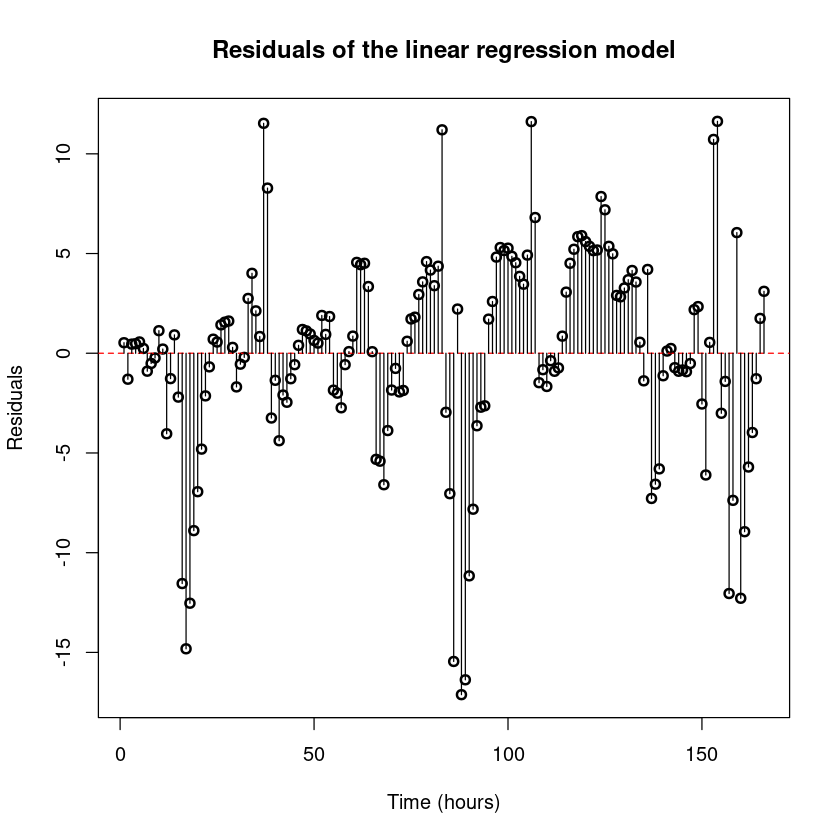

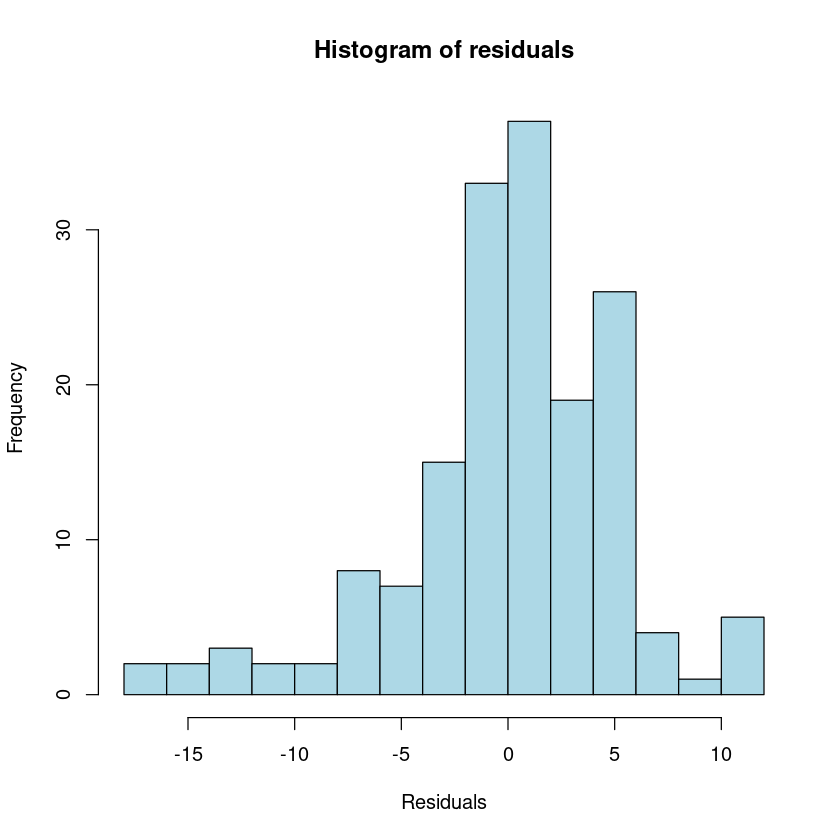

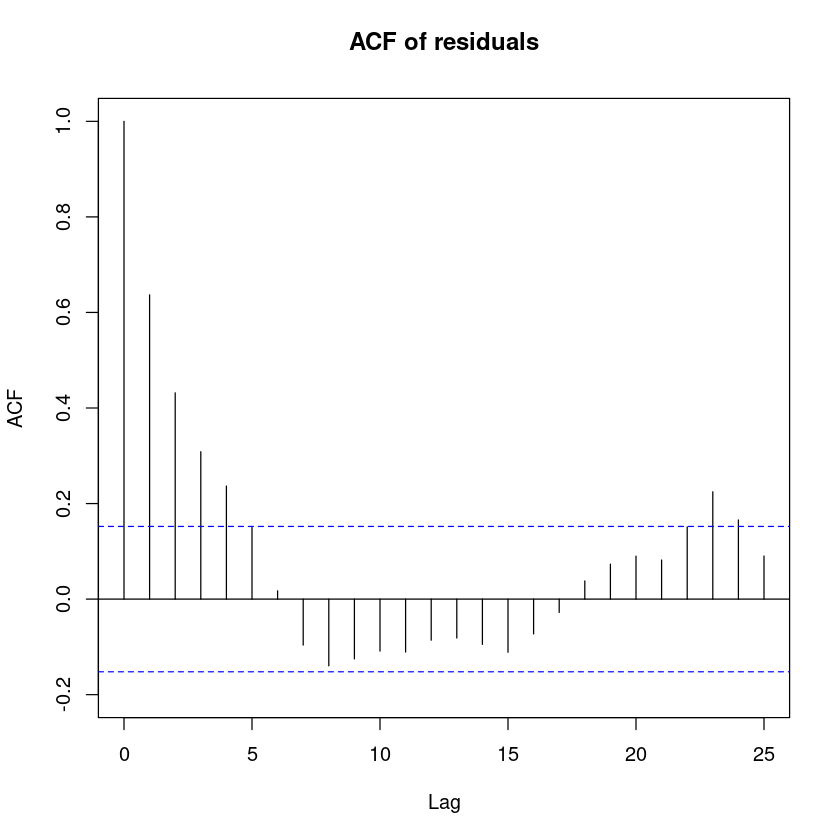

In [28]:
# residuals with vertical lines to the points
par(bg = 'white') 
plot(Dtrain$thour, residuals, type = "p", col = "black", lwd = 2, xlab = "Time (hours)",
    ylab = "Residuals", main = "Residuals of the linear regression model")
abline(h = 0, col = "red", lty = 2)
segments(Dtrain$thour, 0, Dtrain$thour, residuals, col = "black", lty = 1)

# histogram of residuals
hist(residuals, breaks = 20, main = "Histogram of residuals", xlab = "Residuals", ylab = "Frequency", col = "lightblue")
# Acf and ccf of residuals
par(bg = 'white')
acf(residuals, main = "ACF of residuals", lag.max = 25, ylim = c(-0.2, 1))


# dev.copy(png, file = "3_5_residuals.png", width = 600, height = 600, res = 100)
# dev.off()


# last value of

In [ ]:
# last value of Dtest$thour
